## **ADX (Average Directional Index):**

   - *__Purpose__*: ADX measures trend strength and helps traders assess the strength of a trend.
   - *__Activation and Usage__*: Use the `talib.ADX` function in Python. ADX values above 25-30 can indicate a strong trend.
   - *__Strategy__*: High ADX values indicate a strong trend, while low values might suggest a range-bound market.
   - *__Key Points__*: Combine ADX with directional indicators (e.g., +DI and -DI) to assess trend direction.
   - *__Effective Conditions__*: ADX is effective in assessing trend strength and can be combined with other indicators.

In [3]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(talib.ADX.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 ADX(high, low, close[, timeperiod=?])

    Average Directional Movement Index (Momentum Indicators)

    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


Text(0, 0.5, 'Value')

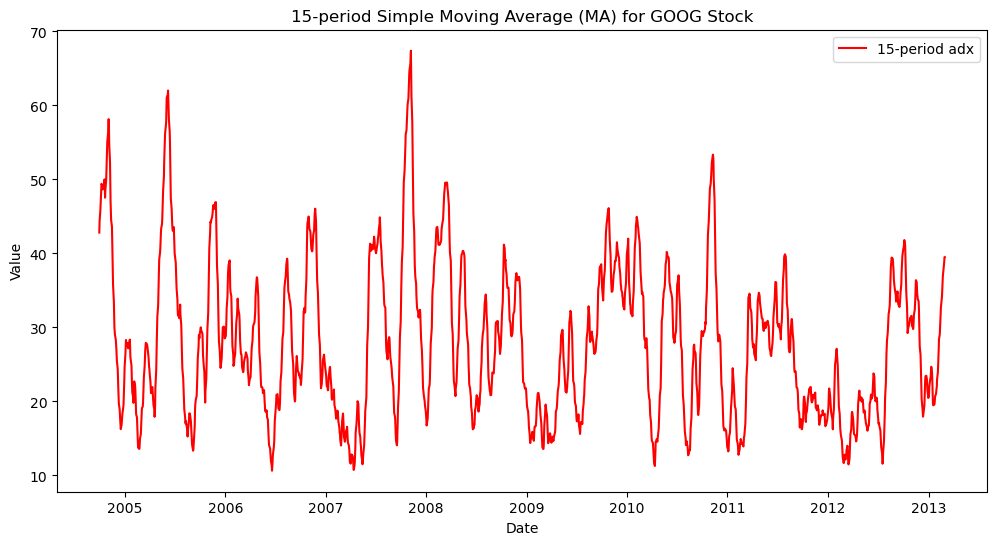

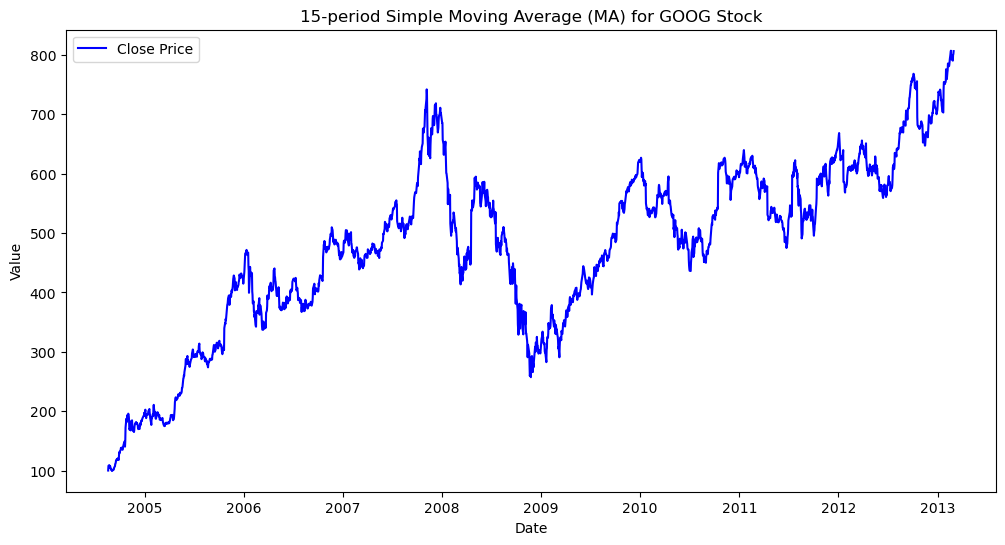

In [8]:
timeperiod = 15
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
# Calculate the Moving Average (MA)
adx = talib.ADX(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
# plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Moving Average (MA)
plt.plot(GOOG.index, adx, label=f'{timeperiod}-period adx', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')
# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')



In [10]:
def optim_func(series):
    if series['# Trades'] < 15 or series['Max. Drawdown [%]'] < -15 or  series['Max. Drawdown Duration'].day > 20:
        return -99
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 

class AdxStrategy(Strategy):
    adx_timeperiod = 14
    adx_threshold = 25  # ADX threshold for generating signals
    
    def init(self):
        self.adx = self.I(talib.ADX, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adx_timeperiod)

    def next(self):
        if self.adx[-1] > self.adx_threshold:
            if not self.position:
                self.buy(stop=self.data.Close * 0.95, tp=self.data.Close *1.05)
        elif self.adx[-1] < self.adx_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdxStrategy, cash=10_000)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\backtesting.py:912: UserWarning: (2004-10-25 00:00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
  warnings.warn(
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\backtesting.py:912: UserWarning: (2005-01-03 00:00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
  war

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    57.44879
Equity Final [$]                    22268.431
Equity Peak [$]                     29984.013
Return [%]                          122.68431
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    9.847557
Volatility (Ann.) [%]               29.882611
Sharpe Ratio                         0.329541
Sortino Ratio                        0.545954
Calmar Ratio                         0.179773
Max. Drawdown [%]                  -54.777603
Avg. Drawdown [%]                   -6.466348
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      116 days 00:00:00
# Trades                                   81
Win Rate [%]                        67.901235
Best Trade [%]                      15.206377
Worst Trade [%]                    -29.936728
Avg. Trade [%]                    

In [ ]:
def optim_func(series):
    if series['# Trades'] < 15 or series['Max. Drawdown [%]'] < -10:
        return -9999
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 


stats = bt.optimize(
    adx_timeperiod = range(4, 30, 5),
    adx_threshold = range(2, 50, 7),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)


In [4]:
adx = lambda data :  1-(1 /talib.ADX(data)[-1])


print(adx(GOOG))

TypeError: ADX() takes at least 3 positional arguments (1 given)